# LAMMPS analysis

This code provides the basic framework needed to run the analysis for the output file "run_traj." It is to note that the initial heterochromatin to euchromatin ratio is ~0.5 and G_me/G_ac=0.2 which implies that the acetylated regions would increase over time which is what we see in this simulation.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Plotting the kymograph

In [2]:
def plot_kymograph(file,iters,num):
    lines = int(num+9)
    print ("Input file is:",file)
    outfile = file+"_kymograph"+".svg"
    
    x = []                         #Iteration number/Dump   
    y = []                         #Bead number 
    c = []
    
    full_file = pd.read_csv(file,header=None)     
    
    for i in np.arange(iters):
        one_iter = full_file[i*lines+9:(i+1)*lines]
        one_iter = one_iter[0].str.split(" ",expand=True).astype("float")
        for j,row in one_iter.iterrows():
            x.append(i)
            y.append(int(row[0]))
            if row[1]==1:
                c.append('b')
            else:
                c.append('r')

    x = np.array(x)
    y = np.array(y)
    c = np.array(c)
    
    plt.figure(figsize=(2,3))
    plt.scatter(x=x,y=y,c=c,s=1,marker="|")

    plt.ylabel("Indexed Beads on the polymer")
    plt.xlabel("Simulation iterations (*5000)")

Input file is: run_traj


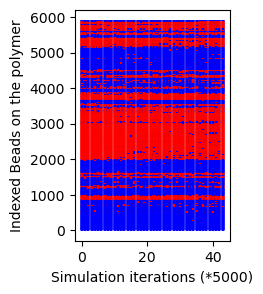

In [3]:
plot_kymograph("run_traj",44,5913)

## Plotting A/B ratio over the simulation

In [4]:
def ab_ratio(file,iters,num):
    lines = int(num+9)
    print ("Input file is:",file)
    outfile = file+"_kymograph"+".svg"
    
    ratio = []                         #ratio
    
    full_file = pd.read_csv(file,header=None)     
    
    for i in np.arange(iters):
        one_iter = full_file[i*lines+9:(i+1)*lines]
        one_iter = one_iter[0].str.split(" ",expand=True).astype("float")
        one_iter = one_iter[one_iter[1]==2.0]
        ab_ratio = (num-len(one_iter))/len(one_iter)
        ratio.append(ab_ratio)

    plt.plot(np.arange(iters),ratio)
    plt.ylabel("A/B ratio")
    plt.xlabel("Simulation iterations (*5000)")

Input file is: run_traj


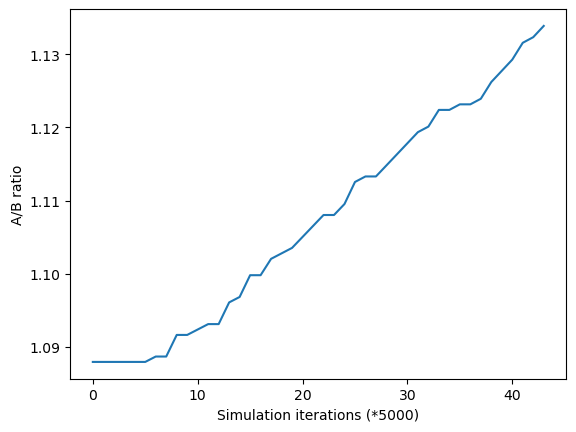

In [5]:
ab_ratio("run_traj",44,5913)